In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta,binom


# 1-generate 2-D gaussian distribution


In [3]:
# given a correlation coefficient, how to generate data samples? 
target_r = .75
nsample = 1000

## way 1: generate distribution from covariance matrix using matlab function
 -- for homework of course you shouldn't use that. 


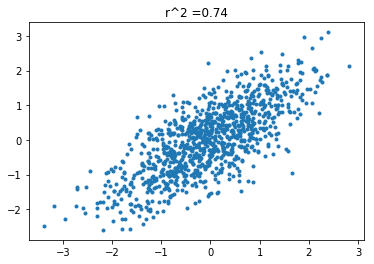

In [9]:
std1 = 1
std2 = 1
std12 = std1*std2*target_r
covmat = np.array([[std1**1,std12],[std12,std2**2]])# "semi-definite" matrix

meanvec = np.array([0,0])
R = np.random.multivariate_normal(meanvec,covmat,nsample)
plotcoeff(R)

In [8]:
def plotcoeff(R):
    plt.plot(R[:,0],R[:,1],'.')
    plt.title('r^2 =%.2f'%np.corrcoef(R[:,0],R[:,1])[1,0])
    plt.show()

## way 2: generate data of unit variance then transform


In [21]:
# first, generate two orthogonal dataset that their covariance is identity
R0 =  np.random.randn(nsample,2)
# check: does R0 have identiy cov?
print(R0.T@R0/(nsample-1)) #way1: check covariance close to I

print(np.corrcoef(R0.T)[1,0]) #way2: check correlation coefficient close to 0
[u,s,v]=np.linalg.svd(R0);
print(s/np.sqrt(nsample)) #way3: check s matrix of original data svd close to I
if abs(np.corrcoef(R0.T)[1,0])<.02:
    print('yes the covariance matrix of R0 is identity')


[[1.05182805 0.0044275 ]
 [0.0044275  0.9558833 ]]
0.004668120385037172
[1.02517311 0.97709966]
yes the covariance matrix of R0 is identity


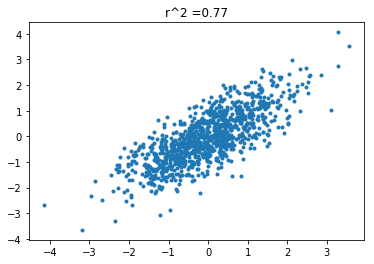

In [24]:
# want the new variance to be sth new: C = M'IM. What should be M?
# C = USU' 
# C = Y'Y = (XM)'XM =M'IM = M'M
# =>=> M = sqrt(S)U'.
[u,s,v] = np.linalg.svd(covmat)
M = np.sqrt(s)* u.transpose()
R = R0@M.T

plotcoeff(np.squeeze(R))

## way 3: use the geometric intuition of coefficience

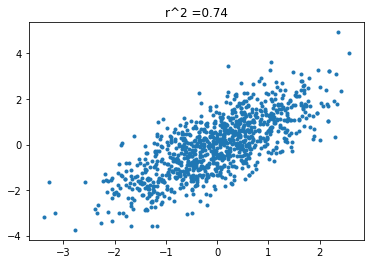

In [26]:
X1 = np.random.randn(nsample,1)
X2 = np.random.randn(nsample,1)
Y1 = X1+X2*np.tan(np.arccos(target_r))
R = np.array([X1,Y1]).T

plotcoeff(np.squeeze(R))

In [ ]:
# FYI: can you use this method to generate data given the full coefficient matrix?

# 2-operation of random variables
What is the mean and variance of:

Y = X1+X2

where X1,X2 are independently drawn from 1-D gaussian

what's your intuition? should it become bigger or smaller?


In [27]:
mean1 = 0
std1 = 5
mean2 = 20
std2 = 2
X1 = np.random.randn(nsample)*std1+mean1 # generate normal variables of given parameters
X2 = np.random.randn(nsample)*std2+mean2

## way1: linear transformation

In [31]:
# E(Y) = E(X)M
# E(Y^2) = ME(X^2)M'
M = np.transpose([1,1])
meanY = np.array([mean1,mean2])@M
varY = M@np.array([[std1**2,0],[0,std2**2]])@M.T
print('mean of X1+X2:%.2f, variance: %.2f'%(meanY,varY))

mean of X1+X2:20.00, variance: 29.00


## way2: vector perspective for determining variance

In [32]:
print('variance: %.2f'%(std1**2 + std2**2))

variance: 29.00


## way3: do simulation

In [36]:
Y1 = X1+X2
print('mean of X1+X2:%.2f, variance: %.2f'%(np.mean(Y1),np.var(Y1)))

mean of X1+X2:19.98, variance: 29.02


# Bayesian belief update

## binomial

In [37]:
N = 10
p = 4/5
Bino = binom(N,p)
print('mean=%.2f, standard dv = %.2f'%(Bino.mean(),Bino.std()))

mean=8.00, standard dv = 1.26


## Beta and Bernoulli distribution

In [42]:
expBern = p
varBern = p*(1-p)
print('mean=%.2f, standard dv = %.2f'%(N*expBern,np.sqrt(N*varBern)))

mean=8.00, standard dv = 1.26


## Inferring posterior of the bias rate

most likely rate is 0.404
most likely rate now becomes 0.414
most likely rate is 0.414


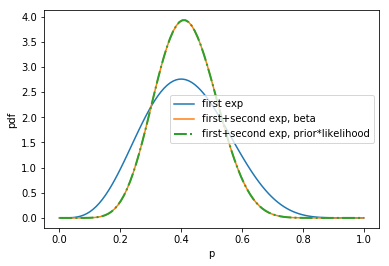

In [43]:
Data1 = np.array([0,0,0,0,0,0,0,1,1,1,1,1])# data from the first sample in class
x = np.linspace(0,1,100)
a = sum(Data1)
b = sum(1-Data1)
beta1 = beta(a,b).pdf(x)
plt.plot(x,beta1,label='first exp')
# find the mode
print('most likely rate is %.3f'%x[np.argmax(beta1)])


# add data from the second experiment
Data2 = np.array([0,0,0,0,0,0,0,1,1,1,1,1])# data from the second sample in class
a2 = a + sum(Data2)
b2 = b + sum(1-Data2)
beta2 = beta(a2,b2).pdf(x)
plt.plot(x,beta2,label='first+second exp, beta')
# find the mode
print('most likely rate now becomes %.3f'%x[np.argmax(beta2)])

# if you don't belief in conjugation...let's check it.
prior = beta1
likelihood = x**sum(Data2) * (1-x)**sum(1-Data2)
posterior = prior*likelihood
print('most likely rate is %.3f'%x[np.argmax(posterior)])
magnifier = max(beta2)/max(posterior)
plt.plot(x,posterior*magnifier,'-.',Linewidth=2,label='first+second exp, prior*likelihood')

# don't forget to notate your figure
plt.xlabel('p')
plt.ylabel('pdf')
plt.legend()
plt.show()
## FYI: test that the conjugation prior of normal distribution is itself